# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.

Implementações:
- Brownlee, Jason. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\mbox{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$ 

## Aplicação

In [1]:
# !pip show statsmodels

In [2]:
# !pip show pmdarima

In [3]:
#!pip install pmdarima --upgrade --user

<AxesSubplot:>

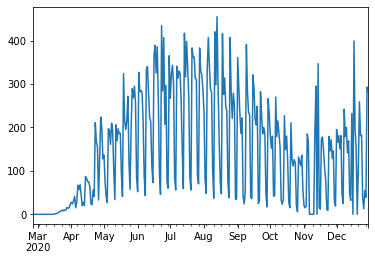

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

# Leitura dos dados de COVID-19 no estado de SP em 2020 - vamos trabalhar com as mortes
covidSP = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [5]:
covidSP.index.max()


Timestamp('2020-12-30 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

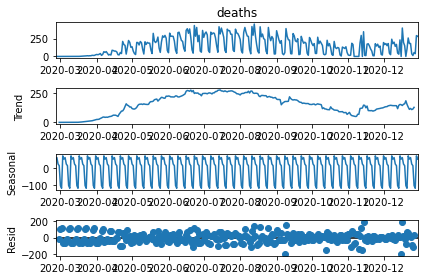

In [6]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

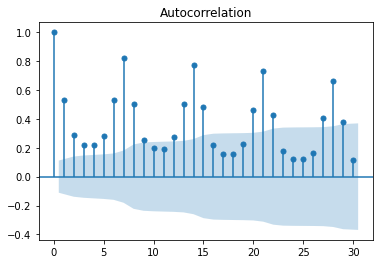

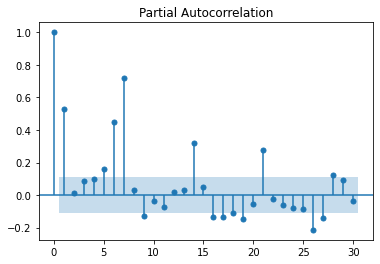

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [8]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.85 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=1.58 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.75 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.14 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=1.13 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.30 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=1.48 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1687.560
Date:                           Mon, 09 Aug 2021   AIC                           3383.121
Time:                                   22:39:56   BIC                           3398.041
Sample:                                        0   HQIC                          3389.087
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9213      0.023    -39.982      0.000      -0.966      -0.876
ar.S.L7        0.9657      0.018     53.037      0.000       0.930       1.001
ma.S.L7       -0.6361      0.053    -12.074      0.000      -0.739      -0.533
sigma2      3250.8511    145.586     22.329      0.000    2965.508    3536.194
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               415.02
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
len(covidSP)

309

In [10]:
len(covidSP)*0.9

278.1

In [11]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [12]:
modelo = SARIMAX(treino['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Mon, 09 Aug 2021   AIC                           3016.188
Time:                                   22:39:57   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.829      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.003      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5418    135.112     21.727      0.000    2670.727    3200.356
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               544.32
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
resultado.fittedvalues

2020-02-26      0.000000
2020-02-27      0.000000
2020-02-28      0.000000
2020-02-29      0.000000
2020-03-01      0.000000
                 ...    
2020-11-25    169.509188
2020-11-26    171.828187
2020-11-27     75.707641
2020-11-28    134.618324
2020-11-29     23.737591
Freq: D, Length: 278, dtype: float64

In [14]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [15]:
previsões

2020-11-30     20.604192
2020-12-01    133.816121
2020-12-02    162.276099
2020-12-03    173.646989
2020-12-04     98.627938
2020-12-05    138.720451
2020-12-06     28.733036
2020-12-07     24.063356
2020-12-08    133.332421
2020-12-09    160.801215
2020-12-10    171.776088
2020-12-11     99.369746
2020-12-12    138.065946
2020-12-13     31.909095
2020-12-14     27.402047
2020-12-15    132.865566
2020-12-16    159.377696
2020-12-17    169.970344
2020-12-18    100.085720
2020-12-19    137.434235
2020-12-20     34.974540
2020-12-21     30.624460
2020-12-22    132.414971
2020-12-23    158.003756
2020-12-24    168.227490
2020-12-25    100.776758
2020-12-26    136.824526
2020-12-27     37.933224
2020-12-28     33.734645
2020-12-29    131.980069
2020-12-30    156.677665
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [16]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=20.60419188, expected=19.0
predicted=133.8161214, expected=195.0
predicted=162.2760989, expected=166.0
predicted=173.6469893, expected=181.0
predicted=98.62793765, expected=151.0
predicted=138.7204506, expected=181.0
predicted=28.73303614, expected=46.0
predicted=24.063356  , expected=25.0
predicted=133.332421 , expected=242.0
predicted=160.8012145, expected=179.0
predicted=171.7760877, expected=200.0
predicted=99.36974623, expected=141.0
predicted=138.0659457, expected=169.0
predicted=31.90909465, expected=47.0
predicted=27.40204682, expected=32.0
predicted=132.8655665, expected=232.0
predicted=159.3776964, expected=0.0
predicted=169.9703445, expected=399.0
predicted=100.0857196, expected=197.0
predicted=137.4342354, expected=151.0
predicted=34.97453965, expected=0.0
predicted=30.62446008, expected=107.0
predicted=132.4149713, expected=259.0
predicted=158.0037556, expected=181.0
predicted=168.2274904, expected=182.0
predicted=100.7767576, expected=37.0
predicted=136.8245258,

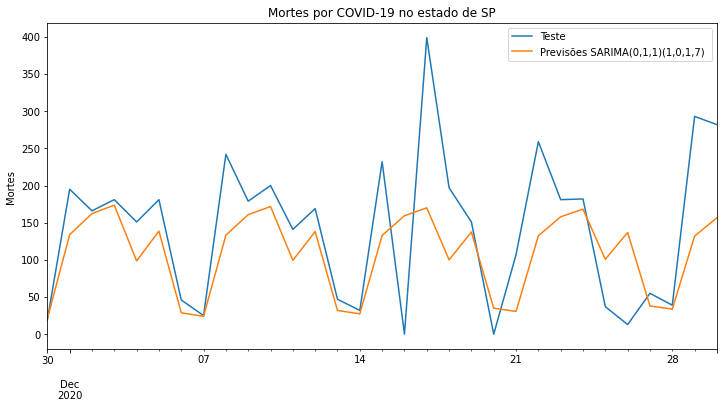

In [17]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

<AxesSubplot:>

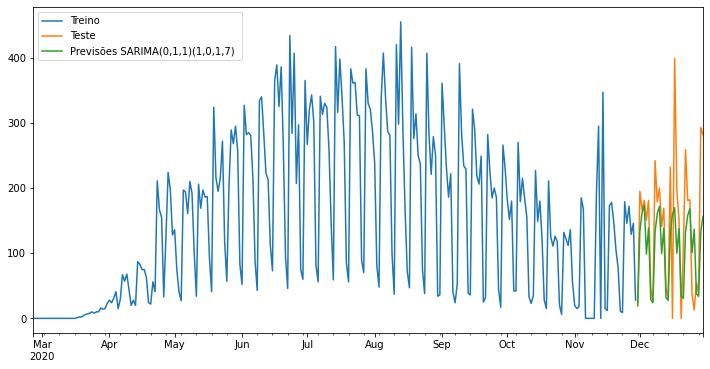

In [18]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [19]:
modelo = SARIMAX(covidSP['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14,typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7)')

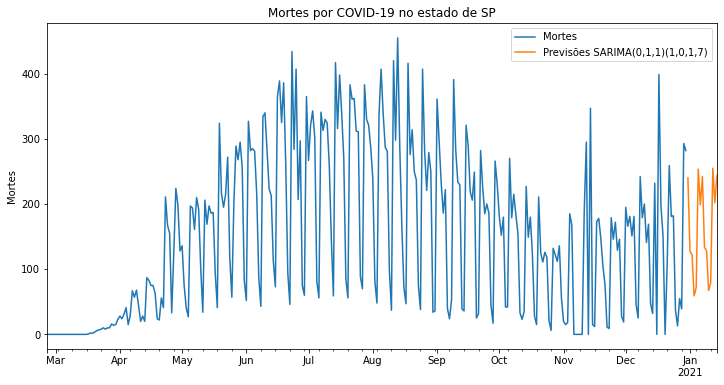

In [20]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

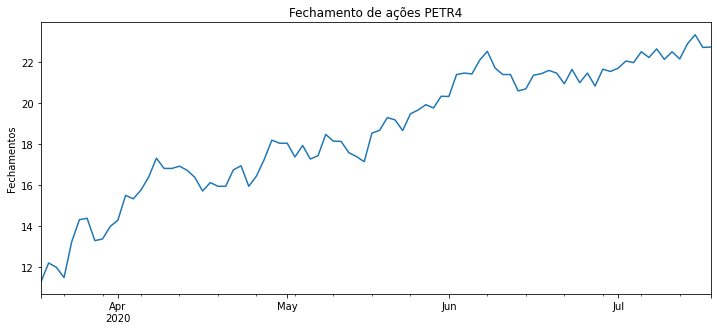

In [21]:
pkgdir = 'dados'

# Dados Fechamento PETR4
df1 = pd.read_csv(f'{pkgdir}/PETR4.csv',index_col='Date',parse_dates=True)
idx = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='B')
df1 = df1.reindex(idx)
df1.fillna(method='ffill',inplace=True) # método forward fill (propaga última observação)

# Plotando os dados de origem
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'
xlabel='' # we don't really need a label here

ax = df1['Close'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

In [22]:
len(df1)

88

In [23]:
len(df1)*0.9

79.2

In [24]:
treino1 = df1.iloc[:79]
teste1 = df1.iloc[79:]

##### PETR4 Sem ARIMA sazonal

In [25]:
stepwise_fit = auto_arima(df1['Close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=False)           # set to stepwise

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=152.390, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.598, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=153.296, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.013, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.746, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=154.697, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=154.117, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=154.674, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.682 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Mon, 09 Aug 2021   AIC                            152.390
Time:                        22:40:02   BIC                            157.322
Sample:                             0   HQIC                           154.376
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

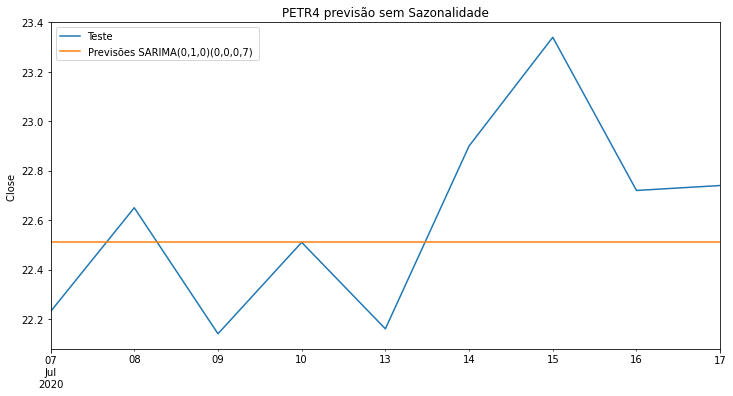

In [26]:
modelo1 = SARIMAX(treino1['Close'],order=(0,1,0),seasonal_order=(0,0,0,0))
resultado1 = modelo1.fit()

# Obtain predicted values
inicio=len(treino1)
fim=len(treino1)+len(teste1)-1
previsões1 = resultado1.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,0)(0,0,0,7) ')
previsões1.index = teste1.index

# Plot predictions against known values
title = 'PETR4 previsão sem Sazonalidade'
ylabel='Close '
xlabel=''

ax = teste1['Close'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões1.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

##### PETR4 Com ARIMA sazonal

In [27]:
stepwise_fit = auto_arima(df1['Close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=7,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=False)           # set to stepwise

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=152.390, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=153.954, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=155.776, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=153.897, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=153.758, Time=0.37 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=154.928, Time=0.53 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=155.500, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=155.289, Time=0.40 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=154.265, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=152.598, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=154.329, Time=0.11 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=156.003, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=154.284, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=154.479, Time=0.40 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=155.578, Time=0.63 sec
 ARIMA(0,1,1)(2,0,0)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Mon, 09 Aug 2021   AIC                            152.390
Time:                        22:40:30   BIC                            157.322
Sample:                             0   HQIC                           154.376
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

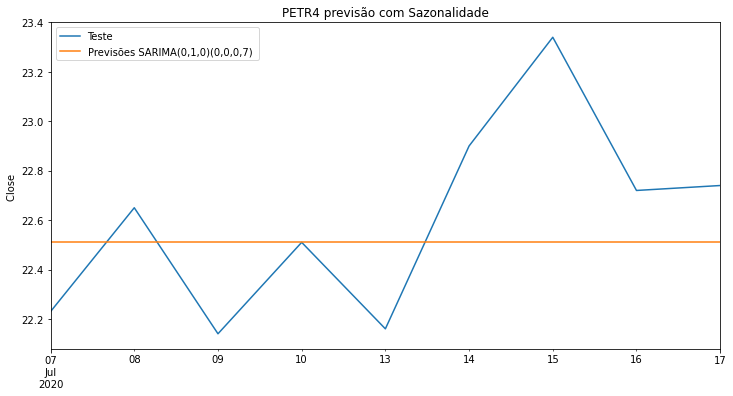

In [28]:
modelo1 = SARIMAX(treino1['Close'],order=(0,1,0),seasonal_order=(0,0,0,7))
resultado1 = modelo1.fit()

# Obtain predicted values
inicio=len(treino1)
fim=len(treino1)+len(teste1)-1
previsões1 = resultado1.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,0)(0,0,0,7) ')
previsões1.index = teste1.index

# Plot predictions against known values
title = 'PETR4 previsão com Sazonalidade'
ylabel='Close '
xlabel=''

ax = teste1['Close'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões1.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

A inclusão da sazonalidade no modelo não melhorou a previsibilidade de PETR4.

## Diagnóstico em modelos SARIMA

### Métricas

In [29]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 6675.141321


In [30]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 81.70153806


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [31]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [32]:
resíduos.describe()

count    309.000000
mean       0.913713
std       57.014427
min     -290.792349
25%      -23.326476
50%        0.000000
75%       24.444249
max      307.669811
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x217d65622e0>,
 'caps': [<matplotlib.lines.Line2D at 0x217d6561250>,
 'boxes': [<matplotlib.lines.Line2D at 0x217d6562460>],
 'medians': [<matplotlib.lines.Line2D at 0x217d6561d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x217d6561b50>],
 'means': []}

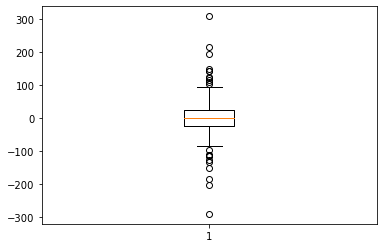

In [33]:
plt.boxplot(resíduos)

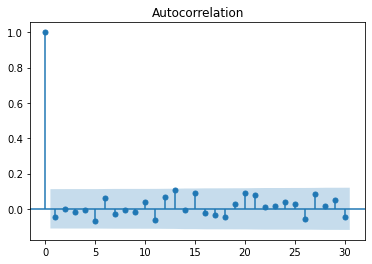

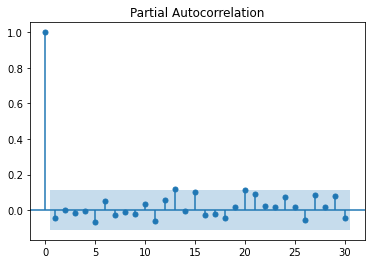

In [34]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

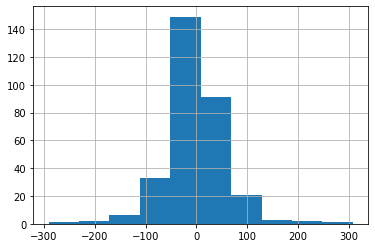

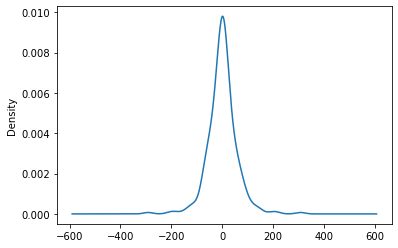

In [35]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

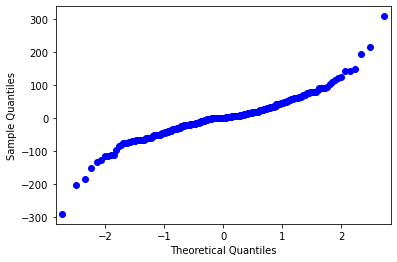

In [36]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**

In [37]:
# Vamos escolher o modelo (2,1,0)(0,0,2)[7]
modelo = SARIMAX(covidSP['deaths'],order=(2,1,0),seasonal_order=(0,0,2,7))
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14,typ='levels').rename('Previsões SARIMA(2,1,0)(0,0,2,7)')

In [38]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid
resíduos.describe()

count    309.000000
mean       1.069962
std       83.310249
min     -196.685736
25%      -49.169258
50%        0.000000
75%       38.908941
max      291.762846
dtype: float64

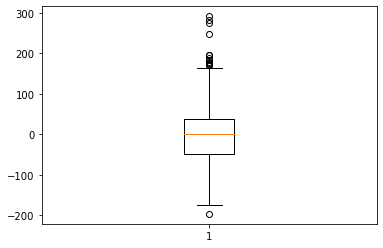

In [39]:
plt.boxplot(resíduos);

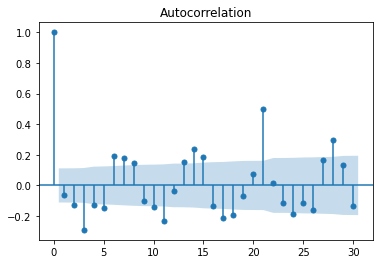

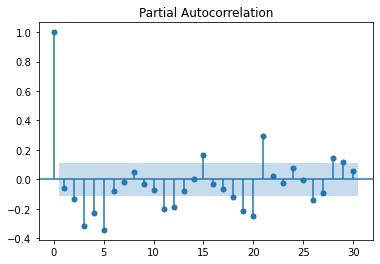

In [40]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

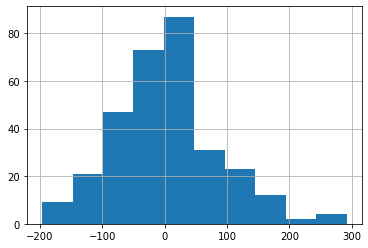

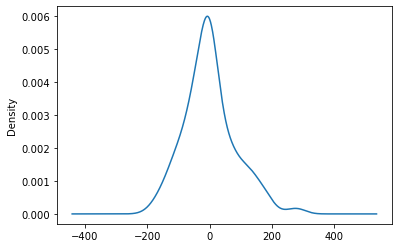

In [41]:
resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

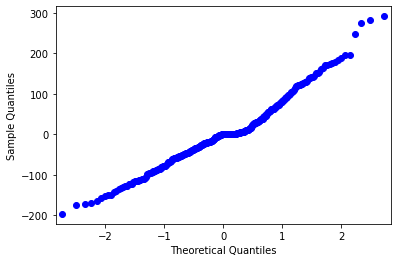

In [42]:
qqplot(resíduos)
pyplot.show()